In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [2]:
df = pd.read_csv("allocations.csv", encoding="latin-1")
df["Day"] = df["Day"].map(lambda x: int(x[4:]))
df.head()

,Day,Position,Position Type,Candidate Id,Candidate Name,Experience,Language Skills,Presentation Skills
0,1,Client Services Assistant,Client Services Assistant,162,Isabella Mitchell,4,4,1
1,1,Client Services Assistant,Client Services Assistant,176,José Carvalho,5,2,4
2,1,Client Services Assistant,Client Services Assistant,210,Madalena Oliveira,5,2,1
3,1,Client Services Assistant,Client Services Assistant,236,Mariana Santos,5,3,0
4,1,Client Services Assistant,Client Services Assistant,317,Tiago Sousa Cruz,4,5,3


In [3]:
df.describe()

,Day,Candidate Id,Experience,Language Skills,Presentation Skills
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,4.914509,169.205298,4.101144,2.467188,2.530403
std,2.420527,96.858874,1.530219,1.471714,1.446998
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,86.000000,4.000000,1.000000,1.000000
50%,5.000000,173.000000,5.000000,2.000000,3.000000
75%,7.000000,255.000000,5.000000,4.000000,4.000000
max,9.000000,330.000000,5.000000,5.000000,5.000000


In [4]:
print("Maximum total working days: ", df.groupby("Candidate Id").count().max()["Day"])

Maximum total working days:  9


In [5]:
days_array = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])
    days_array.append([1 if i in days else 0 for i in range(1, 10)])

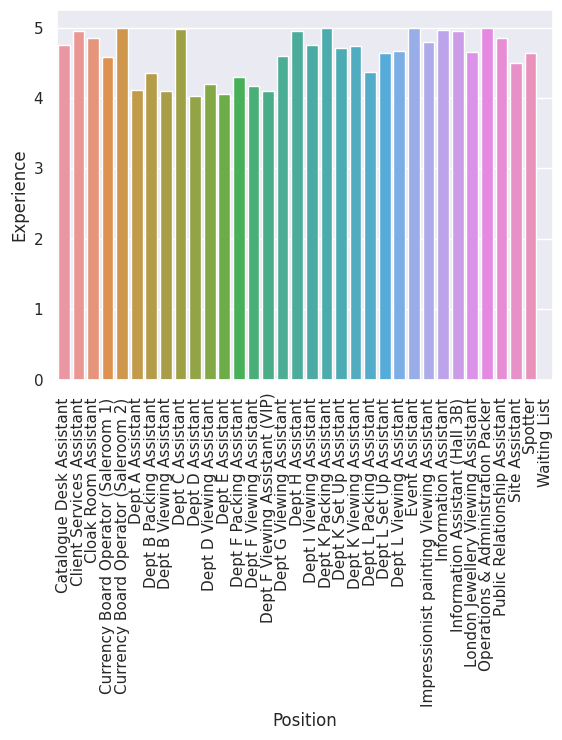

In [6]:
def show_group_by_position():
    df_grouped_by_position = df[["Position", "Experience"]].groupby("Position").mean()
    sns.barplot(data=df_grouped_by_position, x=df_grouped_by_position.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig("fig1.png", bbox_inches="tight")
    plt.show()
    
show_group_by_position()

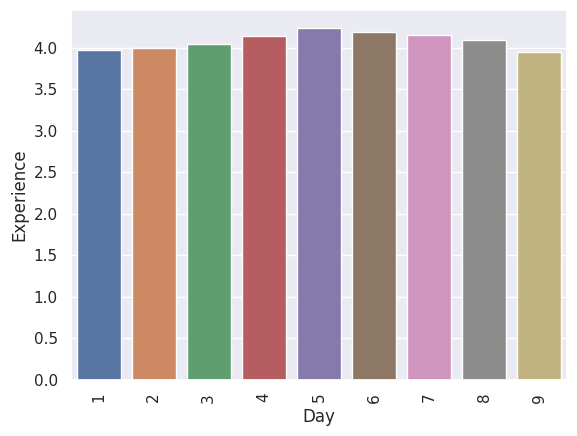

In [7]:
def show_group_by_day():
    df_grouped_by_day = df[["Day", "Experience"]].groupby("Day").mean(numeric_only=True)
    sns.barplot(data=df_grouped_by_day, x=df_grouped_by_day.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig("fig2.png", bbox_inches="tight")
    plt.show()
show_group_by_day()

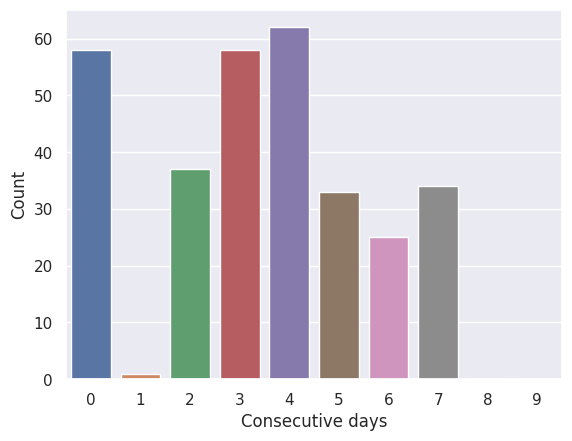

In [8]:
consecutive_days_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0
}

for candidate in df["Candidate Id"].sort_values().unique():
    candidate_df = df[df["Candidate Id"] == candidate]
    candidate_df = candidate_df[candidate_df["Position"] != "Waiting List "]
    days = list(candidate_df["Day"])

    max_consecutive = 0
    consecutive = 0
    for i in range(1, 11):
        if i in days:
            consecutive += 1
        else:
            if consecutive > max_consecutive:
                max_consecutive = consecutive
            consecutive = 0
    consecutive_days_count[max_consecutive] += 1

ax = sns.barplot(x=list(consecutive_days_count.keys()), y=list(consecutive_days_count.values()))
ax.set(xlabel='Consecutive days', ylabel='Count')
plt.savefig("working_days_distribution.png")

In [9]:
gantt_df = df.copy()
gantt_df["Start"] = gantt_df['Day'].map(lambda x: f"2023-06-{x}")
gantt_df["Finish"] = gantt_df['Day'].map(lambda x: f"2023-06-{x+1}")
gantt_df = gantt_df.sort_values(by=["Candidate Name"])


section_size = len(gantt_df["Candidate Name"].unique()) / 4
prev_name="AAAAAAAAAAAAAAAAAAAAA"
for section in range(4):
    last_name = gantt_df["Candidate Name"].unique()[int(section_size+section_size*section) - 1]
    subset_gantt_df = gantt_df[gantt_df["Candidate Name"] > prev_name][gantt_df["Candidate Name"] <= last_name]
    fig = px.timeline(subset_gantt_df, 
                      x_start="Start", 
                      x_end="Finish", y="Candidate Name", 
                      color="Position Type", 
                      height=1500, 
                      category_orders={"Position Type": gantt_df["Position Type"]},
                      hover_data=["Position", "Start", "Finish", "Candidate Name", "Experience", "Language Skills", "Presentation Skills"]
             )
    fig.update_yaxes(autorange="reversed", categoryorder='array', categoryarray=gantt_df["Candidate Name"])
    fig.write_image(f"section_{section}.png")
    fig.show()
    prev_name = last_name

/tmp/ipykernel_3585/1862508806.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_3585/1862508806.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_3585/1862508806.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [10]:
replacement_df = pd.read_csv("test_replace_metrics.csv")
replacement_df.head()

,Objective,Capability,Time
0,2.555402,3.700,2.700
1,2.655847,3.320,2.400
2,2.716291,4.000,3.000
3,2.411847,3.675,3.500
4,2.636735,2.775,1.875


In [11]:
replacement_df.describe()

,Objective,Capability,Time
count,270.000000,270.000000,270.000000
mean,2.636662,2.232330,1.664189
std,0.068541,1.002665,0.776144
min,2.391339,0.000000,0.000000
25%,2.595608,1.623333,1.181818
50%,2.655783,2.151471,1.600000
75%,2.695783,2.800000,2.098958
max,2.736164,5.000000,4.000000


In [12]:
# Convert index to day feature
replacement_df["Day"] = replacement_df.index // 30

In [13]:
replacement_df.head()

,Objective,Capability,Time,Day
0,2.555402,3.700,2.700,0
1,2.655847,3.320,2.400,0
2,2.716291,4.000,3.000,0
3,2.411847,3.675,3.500,0
4,2.636735,2.775,1.875,0


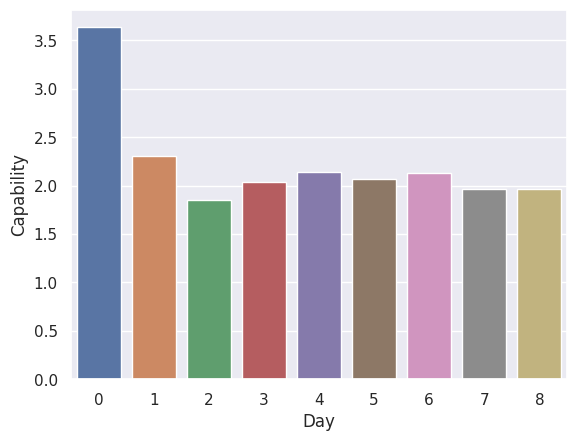

In [14]:
replacement_df_grouped_by_day = replacement_df.groupby("Day").mean()
sns.barplot(data=replacement_df_grouped_by_day, x=replacement_df_grouped_by_day.index, y="Capability")
plt.savefig("fig3.png", bbox_inches="tight")

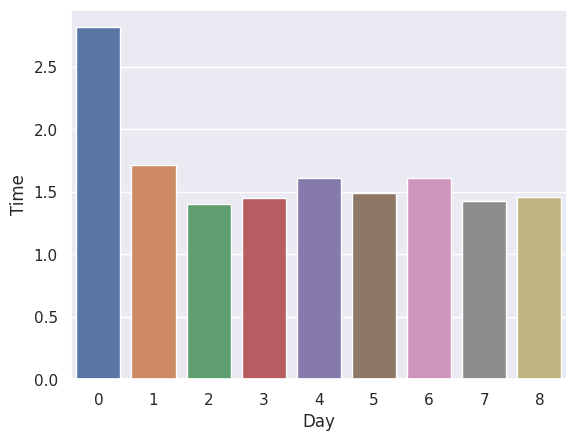

In [15]:
replacement_df_grouped_by_day = replacement_df.groupby("Day").mean()
sns.barplot(data=replacement_df_grouped_by_day, x=replacement_df_grouped_by_day.index, y="Time")
plt.savefig("fig4.png", bbox_inches="tight")